# Определение перспективного тарифа для телеком-компании.  



Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Открываем файлы с данными и изучим общую информацию

In [ ]:
# импортирую библиотеки
import math as mh               # math для математических операций
import pandas as pd             # pandas для работы с датафреймами
import numpy as np              # numpy 
import matplotlib.pyplot as plt # matplotlib для построения графиков
from scipy import stats as st   # stats для проведения статистического анализа

In [ ]:
df_calls.info()     # вывожу на экран сведения о датафрейме звонков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В датафрейме 'df_calls' 202607 строк и 4 столбца, 2 столбца типа object, один float64 и один int64. Данные в столбце 'call_date' нужно привести к формату  'dataime'. Пропусков в данных нет.

In [ ]:
df_calls['duration'].describe() # вывожу на экран основные статистические характеристики df_calls

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Статистические характеристики столбца 'duration' минимальное значение 0, максимальное 38, среднее значение длительности звонка 6.756, медианное значение 6.

In [ ]:
df_calls.head()     # вывожу на экран первые пять строк датафрейма df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
df_calls.tail()     # вывожу на экран последние пять строк датафрейма df_calls

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [ ]:
df_calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

В датафреме данные о звонка 492 пользователей.

In [ ]:
df_internet.info()     # вывожу на экран сведения о датафрейме df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Датафрейм df_internet содержит 149396 строк и 5 столбцов. 2 столбца в формате int64, 2 столбца в формате object, один столбец в формате float64. Данные в столбце 'session_date' нужно привести к формату  'dataime'. Пропусков в данных нет.

In [ ]:
df_internet['mb_used'].describe() # вывожу на экран основные статистические характеристики df_internet

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Статистические характеристики столбца 'mb_used' минимальное значение 0, максимальное 1724.83, среднее значение траффика интернета 74697.5, медианное значение 74697.5 среднее и медиана равны, что говорит о семметричном расположении данных.

In [ ]:
df_internet.head()     # вывожу на экран первые пять строк датафрейма df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
df_internet.tail()     # вывожу на экран последние пять строк датафрейма df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [ ]:
df_internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

В датафреме данные 497 пользователей.

In [ ]:
df_messages.info()     # вывожу на экран сведения о датафрейме df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Датафрейм df_messages содержит 123036 строк и 3 столбца. 2 столбца в формате object, один столбец в формате int64. Данные в столбце 'message_date' нужно привести к формату  'dataime'. Пропусков в данных нет.

In [ ]:
df_messages.count() # вывожу на экран основные статистические характеристики df_messages

id              123036
message_date    123036
user_id         123036
dtype: int64

Датафрейм message_date содержит только данные об отправке смс каждого пользователя, сложив количество строк для одного пользователя можно узнать количество отправленных смс.

In [ ]:
df_messages.head()     # вывожу на экран первые пять строк датафрейма df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
df_messages.tail()     # вывожу на экран последние пять строк датафрейма df_messages

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [ ]:
df_messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

В датафреме данные 426 пользователей.Минимальное количество отправленных смс равно 1, максимальное 1463.

In [ ]:
df_tariffs.info()     # вывожу на экран сведения о датафрейме df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Датафрейм df_tariffs содержит 2 строки и 8 столбцов. 7 столбцов имеют формат int64 и один столбец имеет формат object. Пропусков в данных нет.

In [ ]:
df_tariffs.head()     # вывожу на экран первые пять строк датафрейма df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
df_tariffs.tail()     # вывожу на экран последние пять строк датафрейма df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
df_users.info()     # вывожу на экран сведения о датафрейме df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Датафрейм df_users имеет 500 строк и 8 столбцов. 6 столбцов имею формат object и 2 столбца формат int64. В столбце churn_date заполнены только 38 строк. 

In [ ]:
display(df_users.head())     # вывожу на экран первые пять строк датафрейма df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
display(df_users.tail())     # вывожу на экран последние пять строк датафрейма df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


В нашем распоряжении есть 5 датафреймов: данные о продолжительности звонков, количестве смс, потраченном трафике интернета, данные тарифов и данные пользователей. В датафреймах df_calls, df_internet и df_messages необходимо привести данные в столбце с датами к формату  'dataime'. 

## Предобработка данных

Для выполнения проекта необходимо провести подготовку данных.  
Данные в столбцах 'call_date', 'session_date', 'message_date' датафреймов df_calls, df_internet и df_messages необходимо привести к формату 'dataime'.  
Проверить датафреймы на наличие пропусков и дубликатов и обработать их.  
Необходимо создать и заполнить столбец с месяцем пользования услугами.  
Сгруппировать датафреймы по id пользователя и месяцу пользования услугами.  
Собрать все датафреймы в один и для каждого пользователя посчитать:  
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

In [ ]:
df_calls.isna().sum()        # подсчитываю пропуски
df_calls.duplicated().sum() # проверяю явные дубликаты

0

In [ ]:
df_messages.isna().sum()       # подсчитываю пропуски
df_messages.duplicated().sum() # подсчитываю пропуски

0

In [ ]:
df_internet.isna().sum()       # подсчитываю пропуски
df_internet.duplicated().sum() # подсчитываю пропуски

0

In [ ]:
df_tariffs.isna().sum()        # подсчитываю пропуски
df_tariffs.duplicated().sum()  # подсчитываю пропуски

0

In [ ]:
df_users.isna().sum()          # подсчитываю пропуски
df_users.duplicated().sum()    # подсчитываю пропуски

0

In [ ]:
# данные в колонке "call_date" приведу к формату datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')
# добавлю столбец с месяцем совершения звонков
df_calls['month'] = df_calls['call_date'].dt.month

In [ ]:
# df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')
# вот таким методом в прошлом проекте выделял месяц в предложенном тобой формате

In [ ]:
# данные в колонке "message_date" приведу к формату datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')
# добавлю столбец с месяцем отправки сообщений
df_messages['month'] = df_messages['message_date'].dt.month

In [ ]:
# данные в колонке "session_date" приведу к формату datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')
# добавлю столбец с месяцем пользования интернетом
df_internet['month'] = df_internet['session_date'].dt.month

In [ ]:
# сгруппирую датафрейм по id пользователя и посчитаю количество звонков и длительность всех звонков за каждый месяц
calls = df_calls.groupby(['user_id', 'month']).agg({'duration':['count', 'sum',]}).reset_index()
calls.columns = ['user_id', 'month', 'call', 'duration_sum']
calls.head()

,user_id,month,call,duration_sum
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14


In [ ]:
# сгруппирую датафрейм по id пользователя и посчитаю количество сообщений за каждый месяц
messages = df_messages.groupby(['user_id', 'month']).agg({'id':['count']}).reset_index()
messages.columns = ['user_id', 'month','message']
messages.head()

,user_id,month,message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [ ]:
# сгруппирую датафрейм по id пользователя и посчитаю количество сообщений за каждый месяц
internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used':['sum']}).reset_index()
internet.columns = ['user_id', 'month', 'internet']
internet.head()

,user_id,month,internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [ ]:
# переименую столбец 'tariff_name' на 'tariff' для соединения с датафреймом df_users
df_tariffs=df_tariffs.rename(columns={'tariff_name':'tariff'})
df_tariffs 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# сохраним в датафрейме users столбцы 'user_id', 'city','tariff' из датафрейма df_users
users = df_users.loc[: ,['user_id', 'city','tariff']]
users.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [ ]:
# в датафрейме df объединим датафремы calls, messages, internet по столбцам 'user_id', 'month'
df = calls.merge(messages, on=['user_id', 'month'],  how='outer' ).merge(internet, on=['user_id', 'month'], how='outer' )
df.head()

,user_id,month,call,duration_sum,message,internet
0,1000,5,22.0,150.06,22.0,2253.49
1,1000,6,43.0,158.90,60.0,23233.77
2,1000,7,47.0,318.80,75.0,14003.64
3,1000,8,52.0,389.87,81.0,14055.93
4,1000,9,58.0,440.14,57.0,14568.91


In [ ]:
# в датафрейме users_tariffs объeдиним датафреймы users и df_tariffs по столбцу 'tariff'
users_tariffs = users.merge(df_tariffs, on='tariff',  how='outer' )
users_tariffs.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1003,Москва,ultra,1000,30720,3000,1950,150,1,1
2,1004,Новокузнецк,ultra,1000,30720,3000,1950,150,1,1
3,1013,Иваново,ultra,1000,30720,3000,1950,150,1,1
4,1016,Омск,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
# в датафрейме df добавим датафрейм users_tariffs по столбцам 'user_id'
df = df.merge(users_tariffs, on='user_id',  how='outer' )
df.head()

,user_id,month,call,duration_sum,message,internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,150.06,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,158.90,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,318.80,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,389.87,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,440.14,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
# в датафрейме df удалим строки с пропущенными значениями месяца
df = df.drop(df[df['month'].isna()].index).reset_index(drop=True)


In [ ]:
df.shape

(3214, 9)

In [ ]:
df.user_id.nunique()

498

In [ ]:
# пропущенные значения в столбцах заполним 0
df = df.fillna(0)

In [ ]:
# в цикле посчитаем выручку с каждого пользователя и добавим в столбец 'summa'
for index in range(len(df['user_id'])):
  c = mh.ceil((df.loc[index, 'duration_sum'] - df.loc[index, 'minutes_included']))*(df.loc[index, 'rub_per_minute'])
  m = mh.ceil(df.loc[index, 'message'] - df.loc[index, 'messages_included'])*(df.loc[index, 'rub_per_message'])
  g = mh.ceil((df.loc[index, 'internet'] - df.loc[index, 'mb_per_month_included'])/1024)*(df.loc[index, 'rub_per_gb'])
  
  if c<0:
    c=0
  if m<0:
    m=0
  if g<0:
    g=0
  df.loc[index, 'summa']=c+m+g+df.loc[index, 'rub_monthly_fee']

In [ ]:
df['summa'].describe()

count    3214.000000
mean     1506.616366
std       792.801111
min       550.000000
25%       742.000000
50%      1565.500000
75%      1950.000000
max      6614.000000
Name: summa, dtype: float64

In [ ]:
# оставим в датафрейме df столбцы 'user_id', 'month', 'call', 'duration_sum', 'message', 'internet', 'city', 'tariff', 'summa'
df = df.loc[: ,['user_id', 'month', 'call', 'duration_sum', 'message', 'internet', 'city', 'tariff', 'summa']]

In [ ]:
# в датафрейме ultra сохраним данные для тарифа ultra
ultra = df.query('tariff=="ultra"').reset_index(drop=True)
ultra.head()

,user_id,month,call,duration_sum,message,internet,city,tariff,summa
0,1000,5.0,22.0,150.06,22.0,2253.49,Краснодар,ultra,1950.0
1,1000,6.0,43.0,158.90,60.0,23233.77,Краснодар,ultra,1950.0
2,1000,7.0,47.0,318.80,75.0,14003.64,Краснодар,ultra,1950.0
3,1000,8.0,52.0,389.87,81.0,14055.93,Краснодар,ultra,1950.0
4,1000,9.0,58.0,440.14,57.0,14568.91,Краснодар,ultra,1950.0


In [ ]:
# в датафрейме smart сохраним данные для тарифа smart
smart = df.query('tariff=="smart"').reset_index(drop=True)
smart.head()

,user_id,month,call,duration_sum,message,internet,city,tariff,summa
0,1001,11.0,59.0,408.12,0.0,18429.34,Москва,smart,1150.0
1,1001,12.0,63.0,391.34,0.0,14036.66,Москва,smart,550.0
2,1002,6.0,15.0,110.37,4.0,10856.82,Стерлитамак,smart,550.0
3,1002,7.0,26.0,204.75,11.0,17580.10,Стерлитамак,smart,1150.0
4,1002,8.0,42.0,269.71,13.0,20319.26,Стерлитамак,smart,1550.0


In [ ]:
# в датафрейме moscow сохраним строки с данными для пользователей из Москвы
moscow = df.query('city=="Москва"').reset_index(drop=True)
moscow.head()

,user_id,month,call,duration_sum,message,internet,city,tariff,summa
0,1001,11.0,59.0,408.12,0.0,18429.34,Москва,smart,1150.0
1,1001,12.0,63.0,391.34,0.0,14036.66,Москва,smart,550.0
2,1003,8.0,55.0,355.67,37.0,8565.21,Москва,ultra,1950.0
3,1003,9.0,134.0,904.89,91.0,12468.87,Москва,ultra,1950.0
4,1003,10.0,108.0,809.07,83.0,14768.14,Москва,ultra,1950.0


In [ ]:
# в датафрейме moscow сохраним строки с данными для пользователей из других городов
russia = df.query('city!="Москва"').reset_index(drop=True)
russia.head()

,user_id,month,call,duration_sum,message,internet,city,tariff,summa
0,1000,5.0,22.0,150.06,22.0,2253.49,Краснодар,ultra,1950.0
1,1000,6.0,43.0,158.90,60.0,23233.77,Краснодар,ultra,1950.0
2,1000,7.0,47.0,318.80,75.0,14003.64,Краснодар,ultra,1950.0
3,1000,8.0,52.0,389.87,81.0,14055.93,Краснодар,ultra,1950.0
4,1000,9.0,58.0,440.14,57.0,14568.91,Краснодар,ultra,1950.0


## Анализ данных

In [ ]:
# статистические характеристики датафрейма smart
smart.describe()

,user_id,month,call,duration_sum,message,internet,summa
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,58.463437,394.427026,33.384029,16208.386990,1257.588605
std,146.119496,2.920316,25.939858,179.962207,28.227876,5870.476681,800.915599
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,267.230000,10.000000,12643.010000,550.000000
50%,1239.000000,9.000000,60.000000,397.980000,28.000000,16506.840000,962.000000
75%,1376.000000,11.000000,76.000000,515.070000,51.000000,20042.930000,1733.000000
max,1499.000000,12.000000,198.000000,1354.220000,143.000000,38552.450000,6614.000000


максимальная выручка на тарифе  smart 6614, минимальная 550 и равна абонентской плате, среднее значение 1257.588 медианное значение 962, стандартное отклонение 800.91

In [ ]:
# статистические характеристики датафрейма ultra
ultra.describe()

,user_id,month,call,duration_sum,message,internet,summa
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,73.392893,497.068223,49.363452,19468.805208,2070.152284
std,140.694908,2.871762,43.916853,299.904152,47.804457,10087.170752,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,41.000000,267.750000,6.000000,11770.260000,1950.000000
50%,1277.000000,9.000000,74.000000,488.100000,38.000000,19308.010000,1950.000000
75%,1381.000000,11.000000,104.000000,711.470000,79.000000,26837.690000,1950.000000
max,1495.000000,12.000000,244.000000,1578.060000,224.000000,49745.690000,4800.000000


максимальная выручка на тарифе  smart 4800, минимальная 1950 и равна медианному значению и равна абонентской плате, среднее значение 2070.152, стандартное отклонение 376.19

In [ ]:
display(moscow.describe())
display(russia.describe())


,user_id,month,call,duration_sum,message,internet,summa
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,1268.872340,8.432079,65.436989,442.814877,37.877250,17963.873584,1526.837971
std,137.530432,2.888057,33.186021,228.245911,37.160304,7844.966608,750.221433
min,1001.000000,1.000000,0.000000,0.000000,0.000000,365.090000,550.000000
25%,1171.000000,6.000000,42.000000,285.755000,6.500000,12612.290000,750.000000
50%,1291.000000,9.000000,64.000000,425.410000,29.000000,17537.950000,1750.000000
75%,1385.000000,11.000000,85.500000,585.215000,57.000000,22114.805000,1950.000000
max,1490.000000,12.000000,188.000000,1248.220000,191.000000,44296.860000,5186.000000


,user_id,month,call,duration_sum,message,internet,summa
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1247.533615,8.290434,62.475989,421.909393,38.376104,17030.096416,1501.869766
std,146.011387,2.909368,33.229464,228.505014,35.913289,7495.688612,802.533059
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1120.000000,6.000000,40.000000,264.505000,9.500000,12453.065000,716.500000
50%,1241.000000,9.000000,62.000000,416.290000,30.000000,16853.310000,1550.000000
75%,1377.000000,11.000000,82.000000,550.650000,57.000000,21231.905000,1950.000000
max,1499.000000,12.000000,244.000000,1578.060000,224.000000,49745.690000,6614.000000


максимальная выручка пользователей из Москвы 5186, минимальная 550, среднее значение 1526.84, медианное 1750, стандартное отклонение 750.22  
максимальная выручка пользователей из других городов 6614, минимальная 550, среднее значение 1501.87, медианное 1550, стандартное отклонение 802.533  
средние значения для пользователей из Москвы и пользователей из других городов практически равны. Соответственно нет никакой разницы в каком регионе продвигать услуги.

Посчитаем дисперсию для тарифов.  
Для этого напишу цикл для подсчета дисперсии по столбцам из списка columns_for_var

In [ ]:
# создам список columns_for_var с наименованиями столбцов на основании которых буду считать дисперсию
columns_for_var = ['call', 'duration_sum', 'message', 'internet', 'summa']

In [ ]:
# вычислим дисперсию по тарифам
for name_column in columns_for_var:
    a=np.var(ultra[name_column])
    b=np.var(smart[name_column])
    display(f'дисперсия {name_column} тарифа ultra составляет: {a}')
    display(f'дисперсия {name_column} тарифа smart составляет: {b}')

'дисперсия call тарифа ultra составляет: 1926.7319291916824'

'дисперсия call тарифа smart составляет: 672.5743697067148'

'дисперсия duration_sum тарифа ultra составляет: 89851.18818638667'

'дисперсия duration_sum тарифа smart составляет: 32371.866415692934'

'дисперсия message тарифа ultra составляет: 2282.946075394882'

'дисперсия message тарифа smart составляет: 796.455482917076'

'дисперсия internet тарифа ultra составляет: 101647713.26174639'

'дисперсия internet тарифа smart составляет: 34447035.49528493'

'дисперсия summa тарифа ultra составляет: 141373.07325620347'

'дисперсия summa тарифа smart составляет: 641178.0151415706'

In [ ]:
# вычислим дисперсию по городам
for name_column in columns_for_var:
    m=np.var(moscow[name_column])
    r=np.var(smart[name_column])
    display(f'дисперсия {name_column} данных для Москвы составляет: {m}')
    display(f'дисперсия {name_column} данных для других городов составляет: {r}')

'дисперсия call данных для Москвы составляет: 1099.5095320113253'

'дисперсия call данных для других городов составляет: 672.5743697067148'

'дисперсия duration_sum данных для Москвы составляет: 52010.93220665433'

'дисперсия duration_sum данных для других городов составляет: 32371.866415692934'

'дисперсия message данных для Москвы составляет: 1378.6281403939238'

'дисперсия message данных для других городов составляет: 796.455482917076'

'дисперсия internet данных для Москвы составляет: 61442775.21413102'

'дисперсия internet данных для других городов составляет: 34447035.49528493'

'дисперсия summa данных для Москвы составляет: 561911.0326662577'

'дисперсия summa данных для других городов составляет: 641178.0151415706'

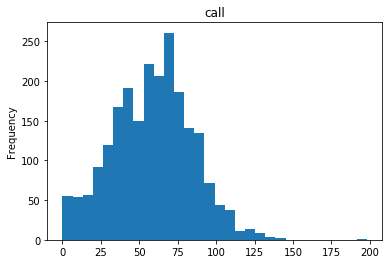

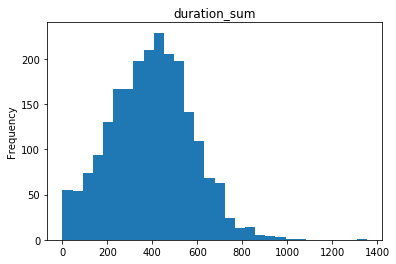

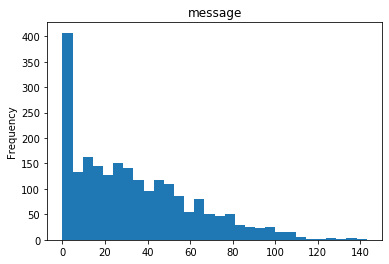

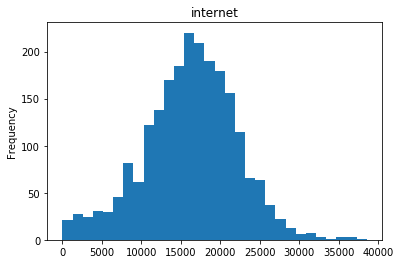

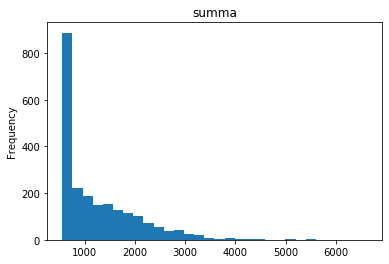

In [ ]:
# построю гистограммы для данных столбцов из списка columns_for_var для тарифа smart
for name_column in columns_for_var:
    smart[name_column].plot(x='month', y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();

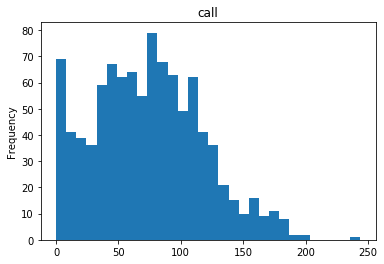

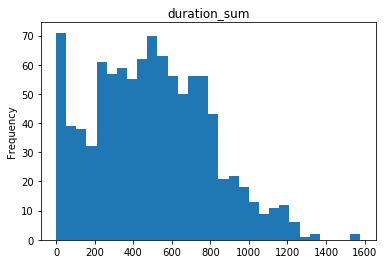

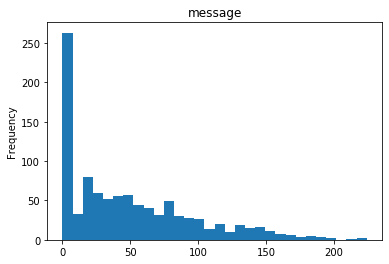

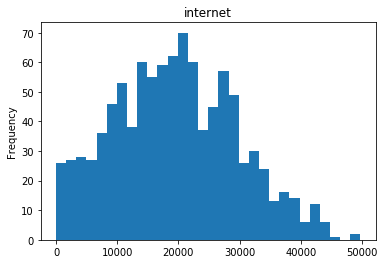

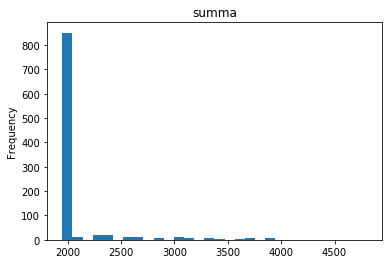

In [ ]:
# построю гистограммы для данных столбцов из списка columns_for_var для тарифа ultra
for name_column in columns_for_var:
    ultra[name_column].plot(x='month', y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();

На гистограммах видно, что пользователи тарифов большую часть выручки приносят, оплачивая абонетскую плату, но некоторые пользователи тарифа ultra тратят сверх абонетской платы.

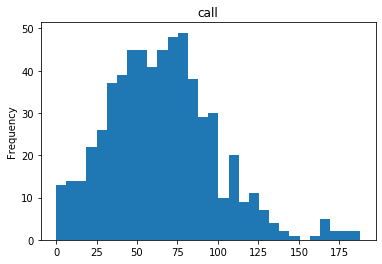

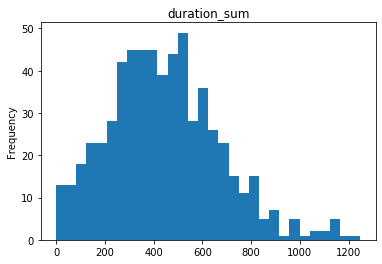

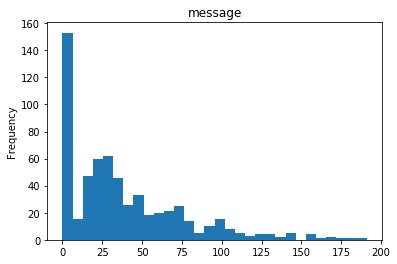

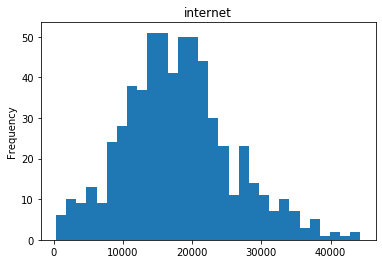

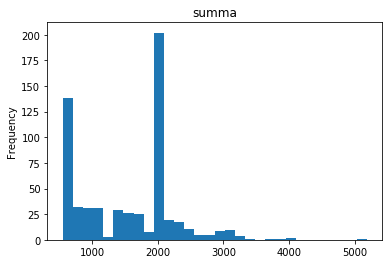

In [ ]:
# построю гистограммы для данных столбцов из списка columns_for_var для пользователей из Москвы
for name_column in columns_for_var:
    moscow[name_column].plot(x='month', y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();

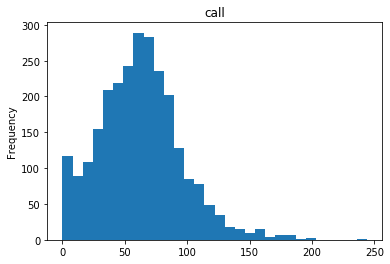

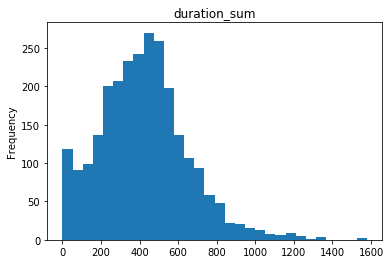

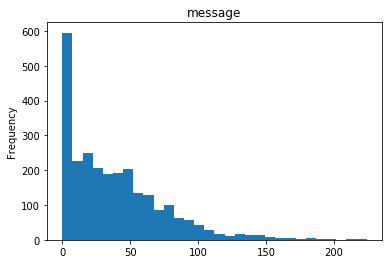

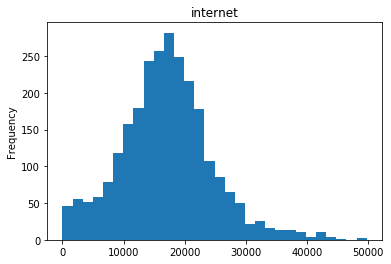

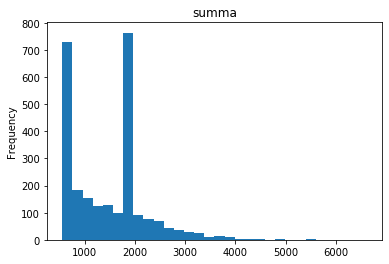

In [ ]:
# построю гистограммы для данных столбцов из списка columns_for_var для пользователей из других регионов
for name_column in columns_for_var:
    russia[name_column].plot(x='month', y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();

##  Проверка гипотез

Нулевая гипотеза: средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» равны  
Альтернативная гипотеза: средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» не равны
Проверим их.

In [ ]:
# сравниваем данные датафреймов smart и ultra
alpha = 0.05 # критический уровень значимости

results =st.ttest_ind(
    smart['summa'], 
    ultra['summa'], equal_var = False) # используем 'equal_var = False' так как выборки различаются

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.179723168444486e-274
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута.
Выручка компании от пользователей тарифов smart и ultra различаются.

Нулевая гипотеза: средняя выручка компании от пользователей из Москвы равна выручке пользователей из других регионов.  
Альтернативная гипотеза: средняя выручка компании от пользователей из Москвы не равна выручке пользователей из других регионов

In [ ]:
# сравниваем данные датафреймов moscow и russia
alpha = 0.05 # критический уровень значимости

results_city =st.ttest_ind(
    moscow['summa'], 
    russia['summa'], equal_var = False) # используем 'equal_var = False' так как выборки различаются

print('p-значение:', results_city.pvalue)

if results_city.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


Выручка компании от пользователей не зависит от региона пользования услугами.

## Общий вывод

В ходе исследования я провел подготовку данных по пользователям тарифов "smart" и "ultra" компании «Мегалайн».  
Вычислил ежемесячную выручку от каждого абонента за год.  
Сравнил пользователей двух тарифов, а также выручку от пользователей из Москвы и других регионов России.  
Сформулировал гипотезы: Средняя выручка компании от пользователей тарифов «Ультра» и «Смарт» равны и средняя выручка компании от пользователей из Москвы равна выручке пользователей из других регионов.  
Приверив эти гипотезы сделал вывод:
Выручка компании не зависит от региона пользования тарифом.  
Пользователи тарифа "ultra" приносят компании больше прибыли.